# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
np.random.seed(631)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#np.random,seed(635)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + weather_api_key
test_response = requests.get(url + "&q=london&units=Imperial")
test_json = test_response.json()
print(json.dumps(test_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 51.5085,
            "lon": -0.1257
        },
        "country": "GB",
        "id": 2643743,
        "name": "London",
        "population": 1000000,
        "sunrise": 1605251746,
        "sunset": 1605284045,
        "timezone": 0
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 99
            },
            "dt": 1605236400,
            "dt_txt": "2020-11-13 03:00:00",
            "main": {
                "feels_like": 43.72,
                "grnd_level": 1008,
                "humidity": 78,
                "pressure": 1012,
                "sea_level": 1012,
                "temp": 51.12,
                "temp_kf": -0.4,
                "temp_max": 51.84,
                "temp_min": 51.12
            },
            "pop": 0,
            "sys": {
                "pod": "n"
            },
            "visibility": 10000,
            "weather": [
                {
  

In [4]:
city_name = []
Lat = []
Lon = []
Max_temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
print(f"Beginning data retrieval")
print(f"---------------------------------")

for i, city in enumerate(cities):

    url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={weather_api_key}&q={city}&units=Imperial"

    response = requests.get(url)
    response_json=response.json()
    try:
        
        city_name.append(response_json["city"]["name"])
        Lat.append(response_json["city"]["coord"]["lat"])
        Lon.append(response_json["city"]["coord"]["lon"])
        Max_temp.append(response_json["list"][0]["main"]["temp_max"])
        Humidity.append(response_json["list"][0]["main"]["humidity"])
        Cloudiness.append(response_json["list"][0]["clouds"]["all"])
        Wind_Speed.append(response_json["list"][0]["wind"]["speed"])
        Country.append(response_json["city"]["country"])
        Date.append(response_json["list"][0]["dt"])
        print(f"Processing Record {i} | {city}")
    except (KeyError, IndexError):
        print(f"error processing, next {city}")
print(f"--------------------------------")
print(f"Data retrieval complete")
print(f"--------------------------------")

Beginning data retrieval
---------------------------------
Processing Record 0 | guerrero negro
Processing Record 1 | vaini
error processing, next vaitupu
Processing Record 3 | birao
Processing Record 4 | new norfolk
Processing Record 5 | inongo
Processing Record 6 | busselton
Processing Record 7 | cidreira
Processing Record 8 | sao joao da barra
Processing Record 9 | qaqortoq
Processing Record 10 | hithadhoo
Processing Record 11 | port alfred
Processing Record 12 | uravakonda
Processing Record 13 | pyu
Processing Record 14 | najran
Processing Record 15 | oparino
Processing Record 16 | kapaa
Processing Record 17 | hobart
error processing, next mys shmidta
Processing Record 19 | khatanga
Processing Record 20 | ancud
error processing, next taolanaro
Processing Record 22 | cape town
Processing Record 23 | ushuaia
Processing Record 24 | cabo san lucas
Processing Record 25 | longyearbyen
error processing, next tabukiniberu
Processing Record 27 | hermanus
Processing Record 28 | boguchany
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Cities_Weather_df=pd.DataFrame({ "City": city_name, "Lat": Lat, "Lng": Lon, "Max Temp": Max_temp, "Humidity": Humidity, "Cloudiness": Cloudiness, "Wind Speed": Wind_Speed, "Country": Country, "Date": Date})
Cities_Weather_df.to_csv("Weather_Output.csv")
Cities_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,65.77,65,55,11.43,MX,1605236400
1,Vaini,-21.2000,-175.2000,79.74,84,58,13.98,TO,1605236400
2,Birao,10.2849,22.7882,71.87,24,5,6.62,CF,1605236400
3,New Norfolk,-42.7826,147.0587,70.74,47,76,7.61,AU,1605236400
4,Inongo,-1.9500,18.2667,70.75,94,97,4.27,CD,1605236400
...,...,...,...,...,...,...,...,...,...
555,Hof,50.3167,11.9167,40.69,90,69,5.06,DE,1605236400
556,Kruisfontein,-34.0033,24.7314,61.18,88,0,5.93,ZA,1605236400
557,Kalat,29.0225,66.5916,51.71,47,15,4.88,PK,1605236400
558,Vestmanna,62.1564,-7.1664,48.61,91,100,19.69,FO,1605236400


In [6]:
Cities_Weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.574684,15.535319,58.085714,75.723214,53.292857,7.713536,1.605236e+09
std,33.121705,88.826439,23.919168,17.211101,36.454446,5.397889,0.000000e+00
min,-54.800000,-175.200000,-18.060000,12.000000,0.000000,0.310000,1.605236e+09
25%,-7.590750,-60.633775,43.147500,67.000000,17.000000,3.637500,1.605236e+09
50%,18.262550,17.941050,65.250000,81.000000,57.000000,6.430000,1.605236e+09
75%,47.604100,96.204700,76.680000,88.000000,91.000000,10.522500,1.605236e+09
max,78.218600,179.316700,104.920000,99.000000,100.000000,34.870000,1.605236e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Cities_Weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.574684,15.535319,58.085714,75.723214,53.292857,7.713536,1.605236e+09
std,33.121705,88.826439,23.919168,17.211101,36.454446,5.397889,0.000000e+00
min,-54.800000,-175.200000,-18.060000,12.000000,0.000000,0.310000,1.605236e+09
25%,-7.590750,-60.633775,43.147500,67.000000,17.000000,3.637500,1.605236e+09
50%,18.262550,17.941050,65.250000,81.000000,57.000000,6.430000,1.605236e+09
75%,47.604100,96.204700,76.680000,88.000000,91.000000,10.522500,1.605236e+09
max,78.218600,179.316700,104.920000,99.000000,100.000000,34.870000,1.605236e+09


In [8]:
#  Get the indices of cities that have humidity over 100
Cities_Weather_gt100_index = Cities_Weather_df.index[Cities_Weather_df["Humidity"] > 100]
Cities_Weather_gt100_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Clean_city_df = Cities_Weather_df.drop(Cities_Weather_gt100_index,inplace=False)
Clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,65.77,65,55,11.43,MX,1605236400
1,Vaini,-21.2000,-175.2000,79.74,84,58,13.98,TO,1605236400
2,Birao,10.2849,22.7882,71.87,24,5,6.62,CF,1605236400
3,New Norfolk,-42.7826,147.0587,70.74,47,76,7.61,AU,1605236400
4,Inongo,-1.9500,18.2667,70.75,94,97,4.27,CD,1605236400


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

(11/13/2020)


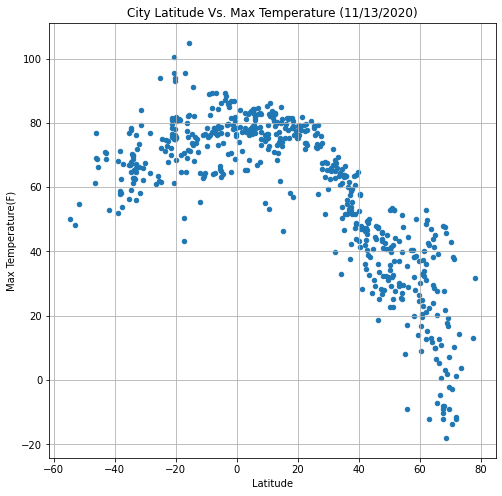

In [10]:
Date_Secs = Clean_city_df.iloc[0,8]
Date_full = str(pd.to_datetime(Date_Secs, unit="s"))
time_list = Date_full.split(" ")
date_list = time_list[0].split("-")
my_date= f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
print(my_date)
Clean_city_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Max Temperature {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()

## Latitude vs. Humidity Plot

(11/13/2020)


Text(0, 0.5, 'Humidity(%)')

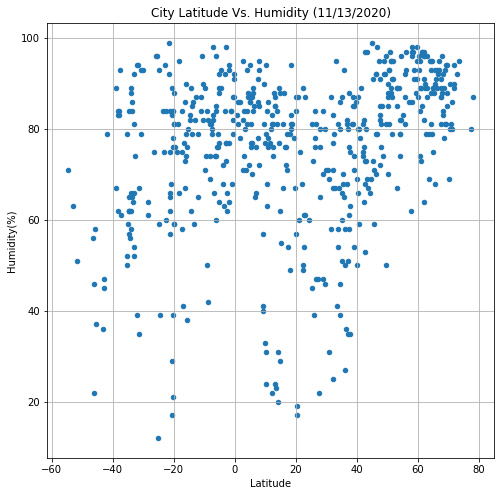

In [11]:
Date_Secs = Clean_city_df.iloc[0,8]
Date_full = str(pd.to_datetime(Date_Secs, unit="s"))
time_list = Date_full.split(" ")
date_list = time_list[0].split("-")
my_date= f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
print(my_date)
Clean_city_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title=f"City Latitude Vs. Humidity {my_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

## Latitude vs. Cloudiness Plot

(11/13/2020)


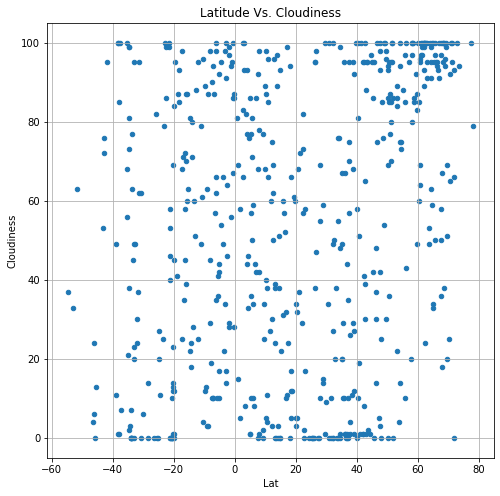

In [12]:
Date_Secs = Clean_city_df.iloc[0,8]
Date_full = str(pd.to_datetime(Date_Secs, unit="s"))
time_list = Date_full.split(" ")
date_list = time_list[0].split("-")
my_date= f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
print(my_date)
Clean_city_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness")

## Latitude vs. Wind Speed Plot

(11/13/2020)


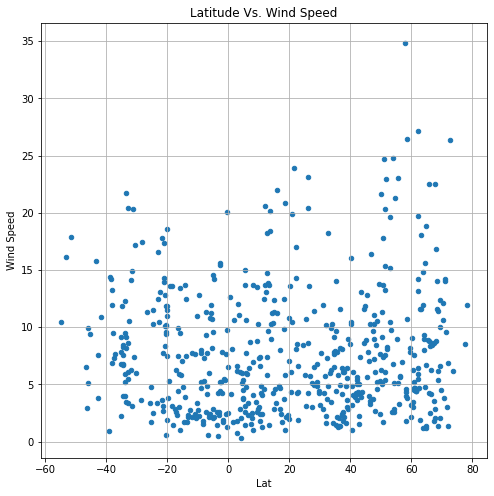

In [13]:
Date_Secs = Clean_city_df.iloc[0,8]
Date_full = str(pd.to_datetime(Date_Secs, unit="s"))
time_list = Date_full.split(" ")
date_list = time_list[0].split("-")
my_date= f"({date_list[1]}/{date_list[2]}/{date_list[0]})"
print(my_date)
Clean_city_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed")

## Linear Regression

In [14]:
Northern_Hemisphere_df = Clean_city_df.loc[Clean_city_df["Lat"] >= 0, :]
southern_Hemisphere_df = Clean_city_df.loc[Clean_city_df["Lat"] <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


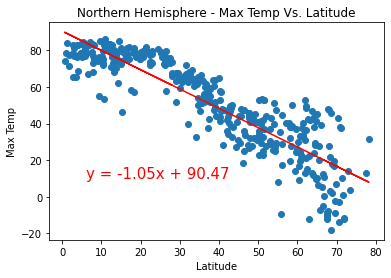

In [15]:
x_axis = Northern_Hemisphere_df["Lat"]
y_axis = Northern_Hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48


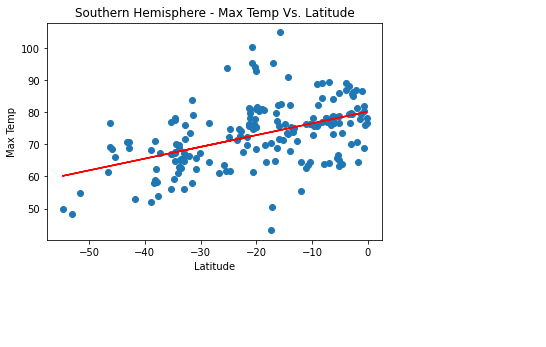

In [16]:
x_axis = southern_Hemisphere_df["Lat"]
y_axis = southern_Hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.34


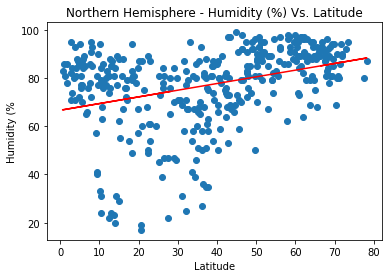

In [17]:
x_axis = Northern_Hemisphere_df["Lat"]
y_axis = Northern_Hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.34


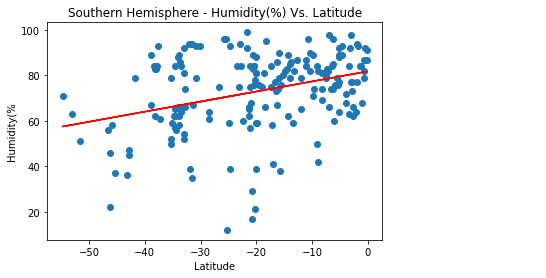

In [18]:
x_axis = southern_Hemisphere_df["Lat"]
y_axis = southern_Hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36


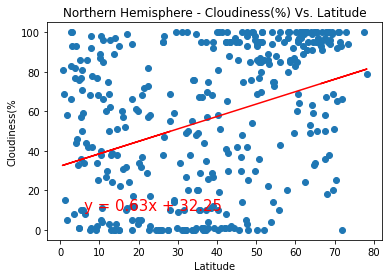

In [19]:
x_axis = Northern_Hemisphere_df["Lat"]
y_axis = Northern_Hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20


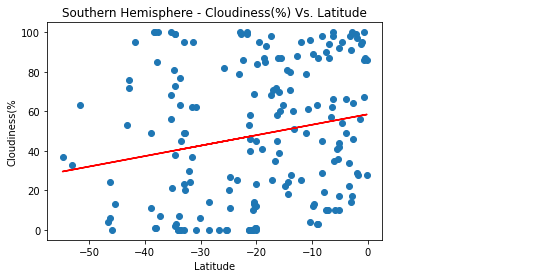

In [20]:
x_axis = southern_Hemisphere_df["Lat"]
y_axis = southern_Hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13


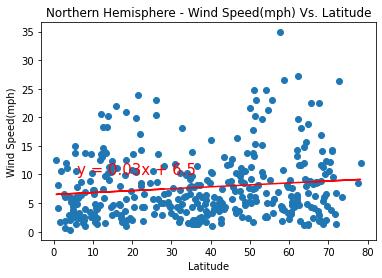

In [21]:
x_axis = Northern_Hemisphere_df["Lat"]
y_axis = Northern_Hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28


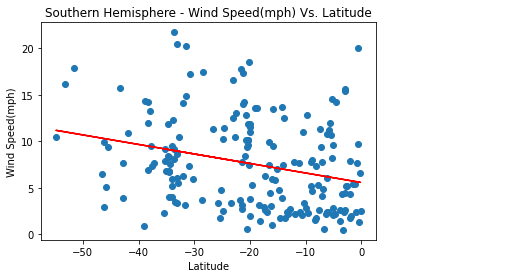

In [22]:
x_axis = southern_Hemisphere_df["Lat"]
y_axis = southern_Hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed(mph) Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-value is: {rvalue:.2f}") 
plt.show()